In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
df = pd.read_csv('./data/full.csv')
munis = pd.read_csv('./data/municipios.csv')[:-1]

In [2]:
df['creado'] = pd.to_datetime(df['creado'])
df.index = pd.DatetimeIndex(df['creado'])

# df = df.loc[df.index < '2015-12-31 08:00:00']

Poblacion vs cantidad de comentarios por municipio


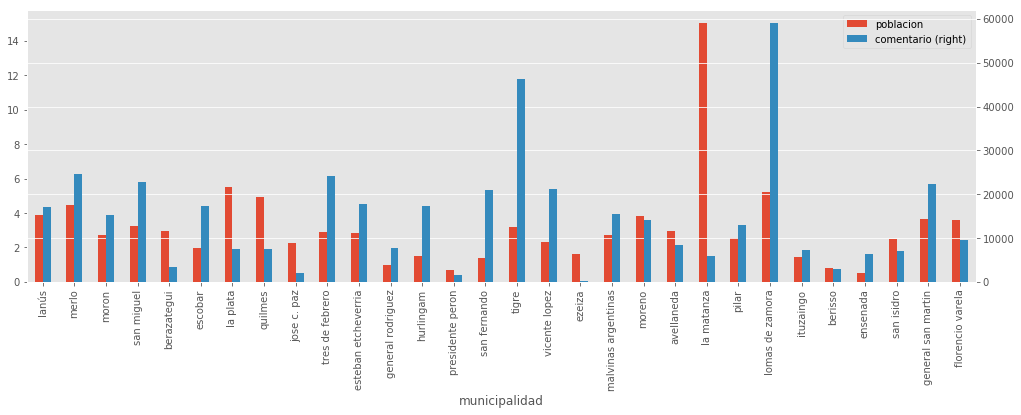

In [3]:
print 'Poblacion vs cantidad de comentarios por municipio'
muniCount = df.groupby('muni').count()
munis['poblacion'] = munis['porcentaje'].astype(float)
muniCount['muni'] = muniCount.index
mdf = pd.concat([muniCount.set_index('muni'), munis.set_index('pagina de facebook')], axis=1, join='inner').reset_index()
mdf.plot.bar(y=['poblacion', 'comentario'], x='municipalidad', figsize=(17,5), secondary_y=['comentario'])

Cantidad de comentarios por tiempo


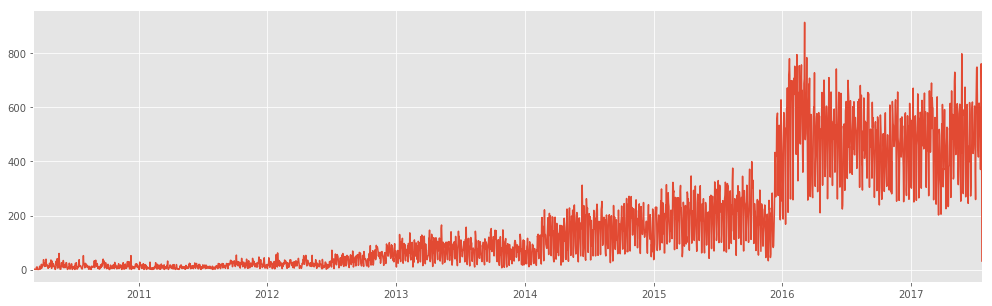

Longitud de los comentarios


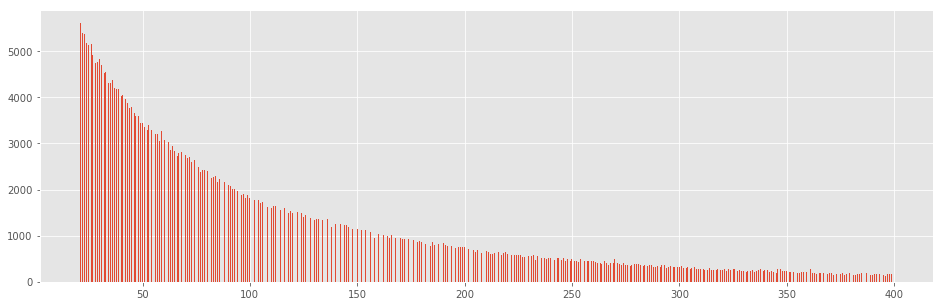

In [4]:
print 'Cantidad de comentarios por tiempo'
df.groupby(df.index.date).count()['comentario'].plot(figsize=(17,5))
plt.show()
print 'Longitud de los comentarios'
df['comentario'].apply(lambda x: len(x)).hist(figsize=(16, 5), bins=1000)

LanusMunicipio


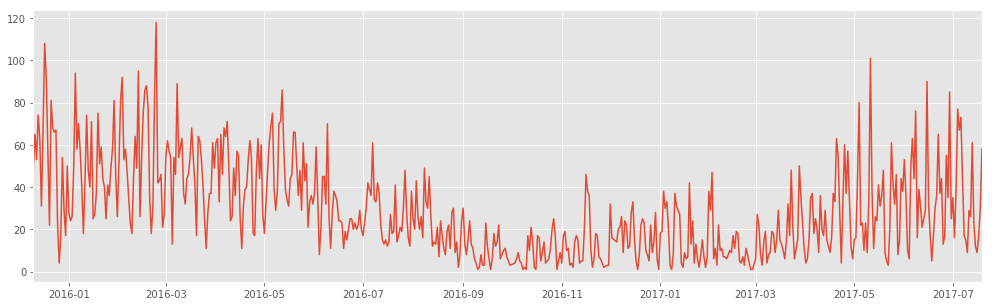

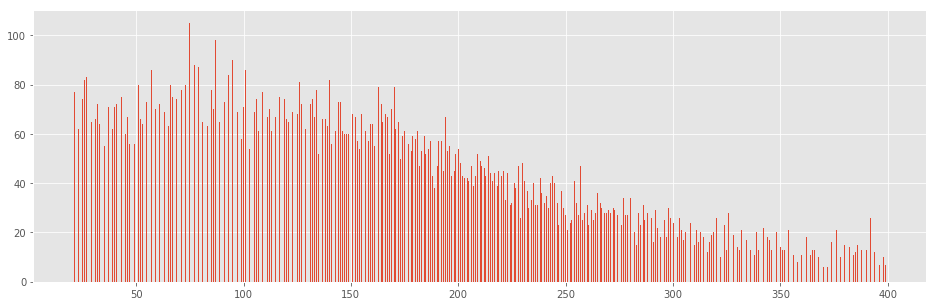

MerloGob


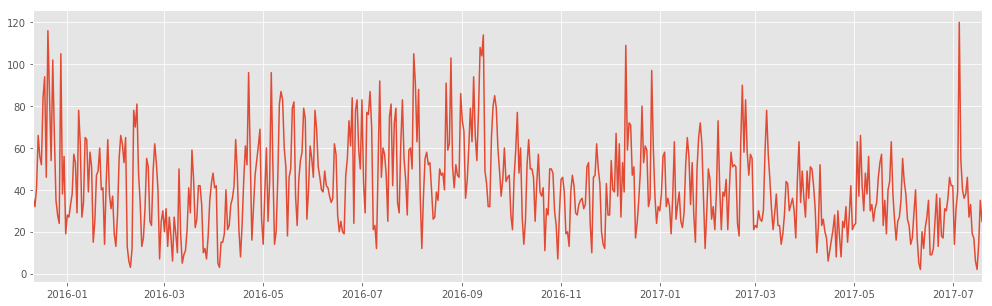

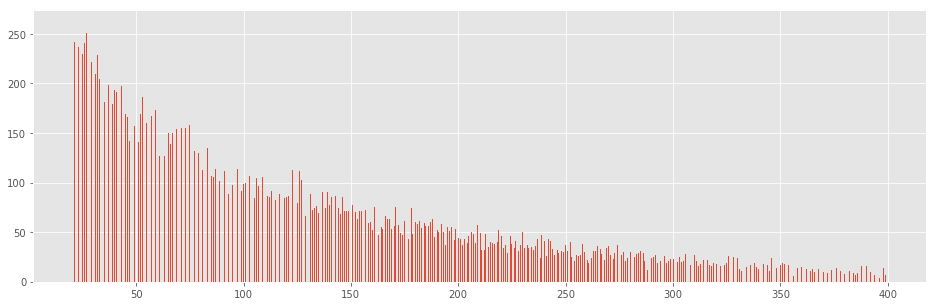

MoronGobierno


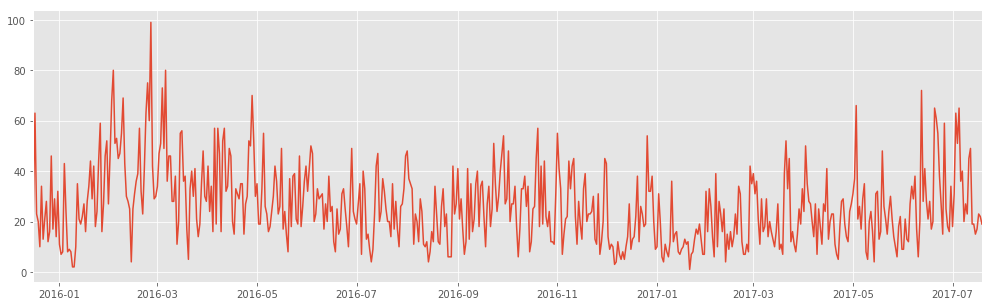

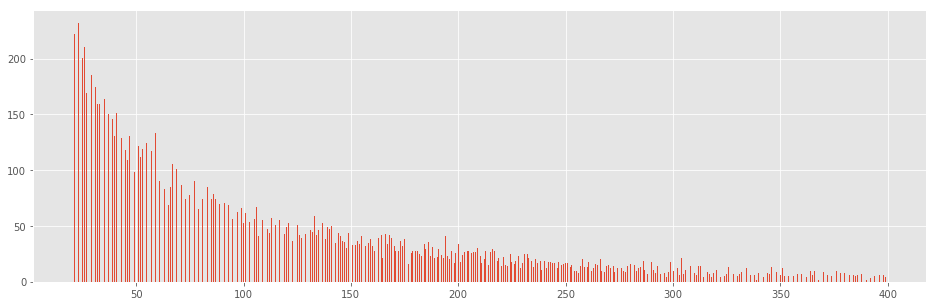

MuniSanMiguelBA


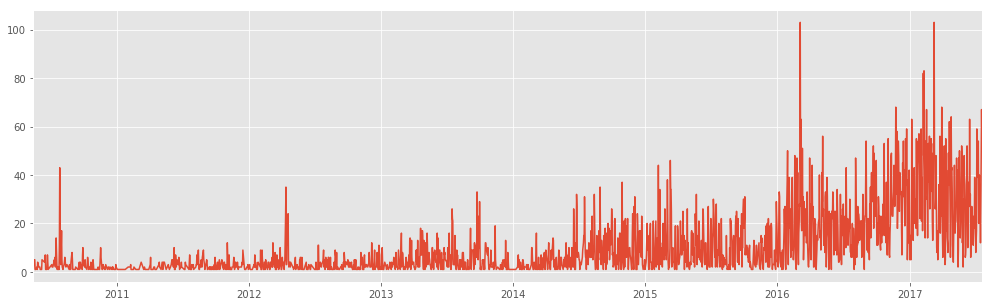

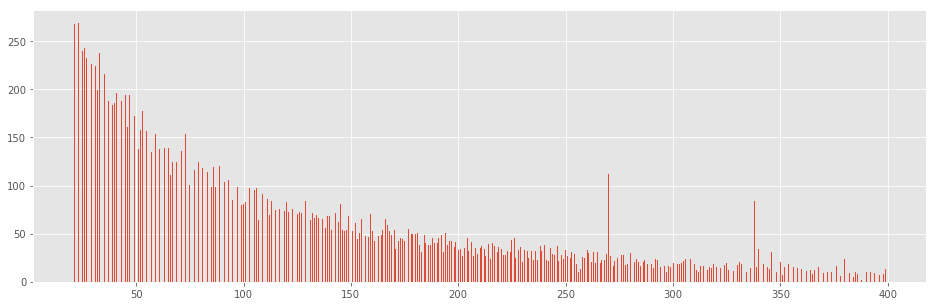

MunicipalidadBerazategui


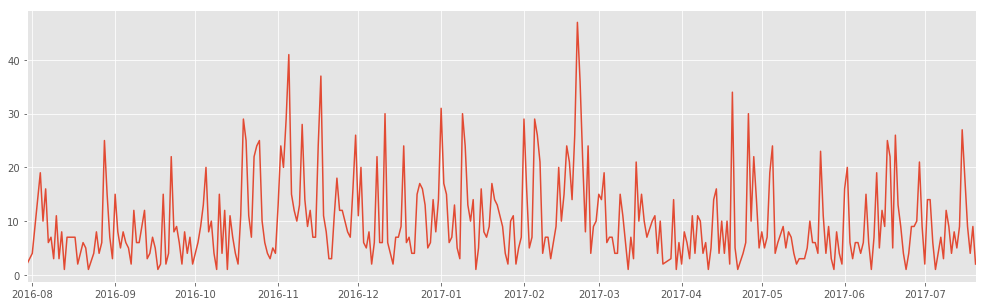

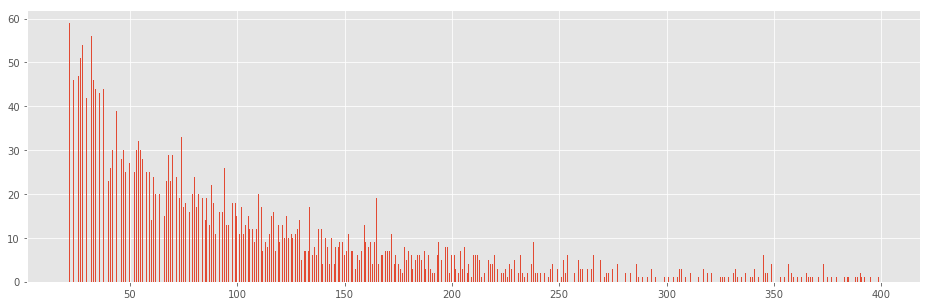

MunicipalidadDeEscobar


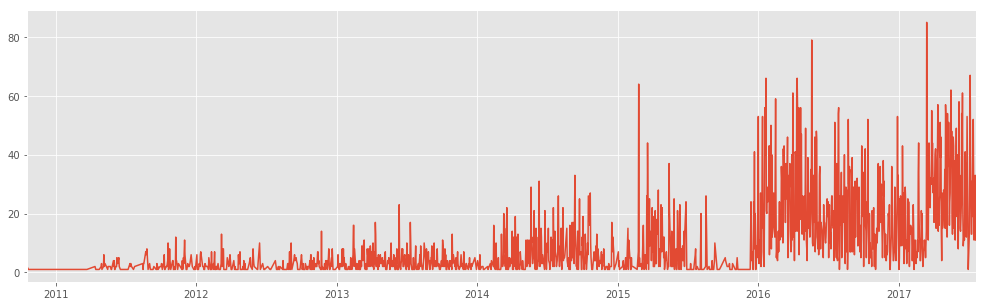

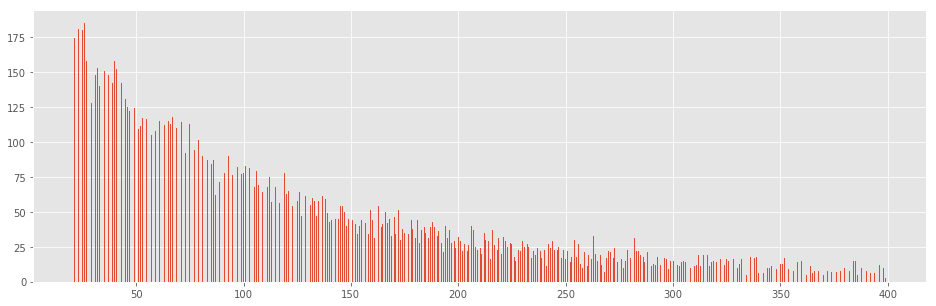

MunicipalidadDeLaPlata


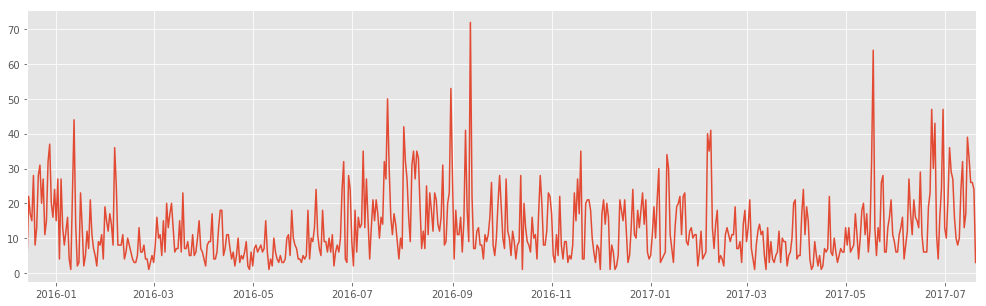

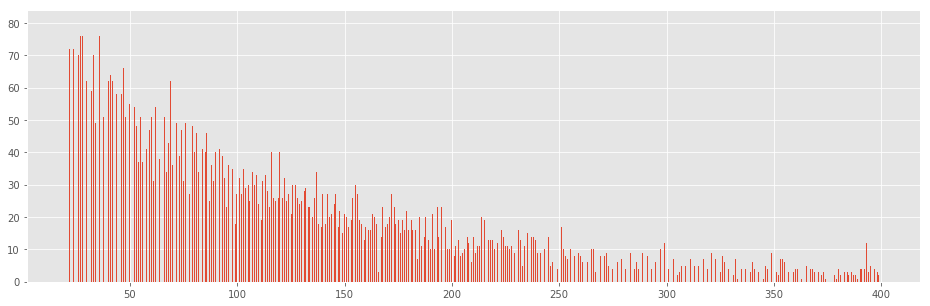

MunicipalidadDeQuilmesOficial


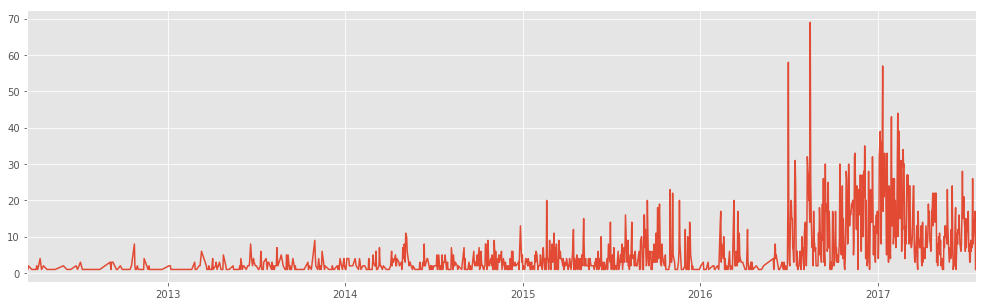

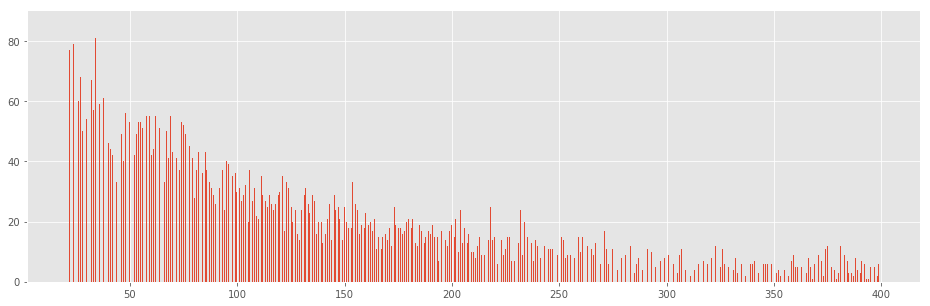

MunicipalidadJCP


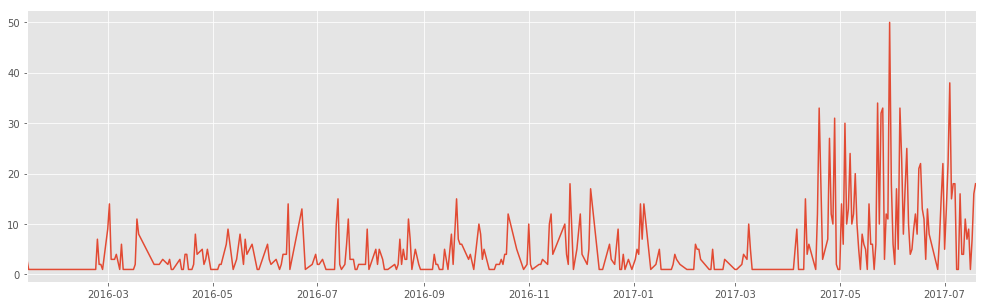

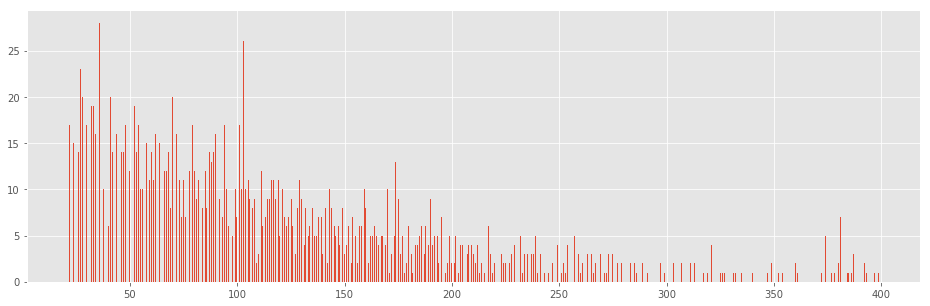

MunicipalidadTresdeFebrero


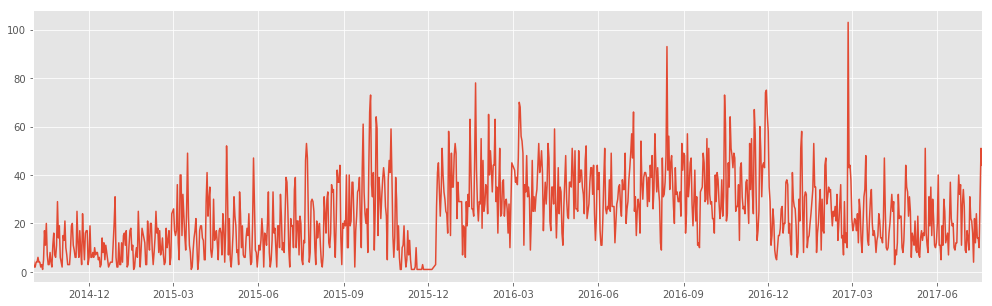

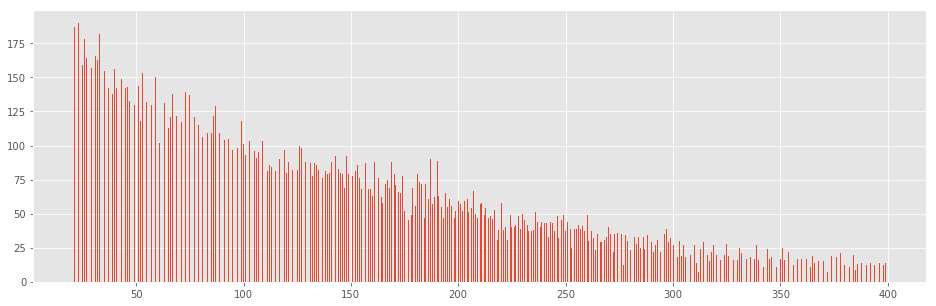

MunicipioEE


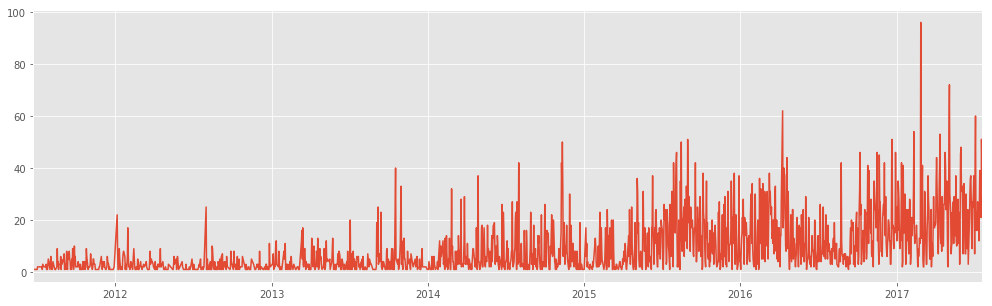

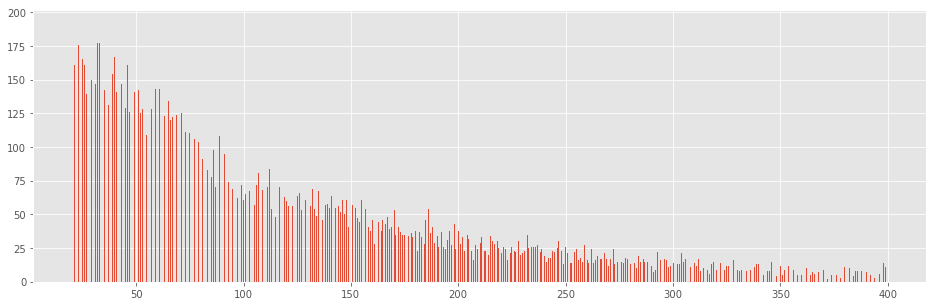

MunicipiodeGeneralRodriguez


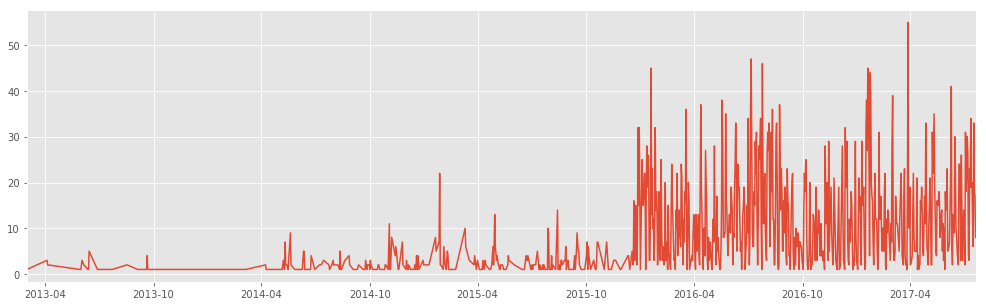

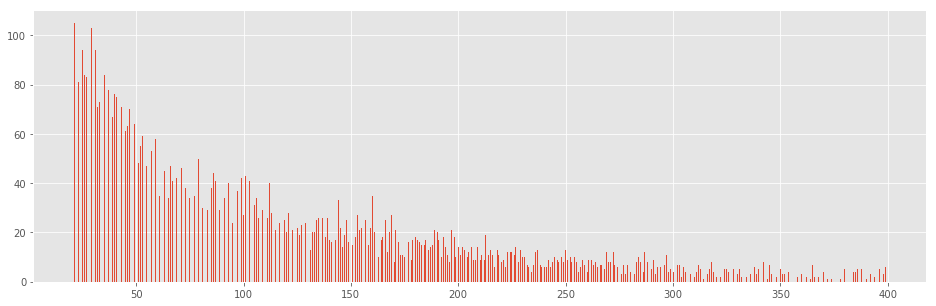

Municipiodehurlingham


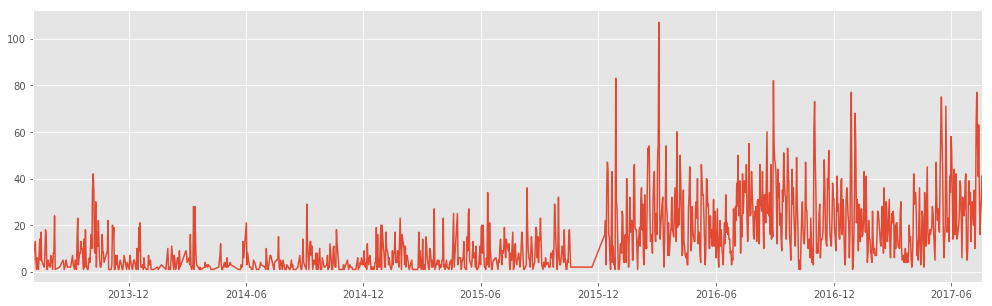

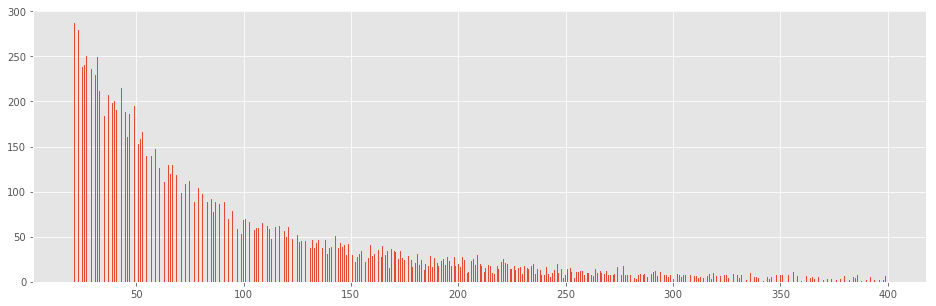

PPeronMunicipio


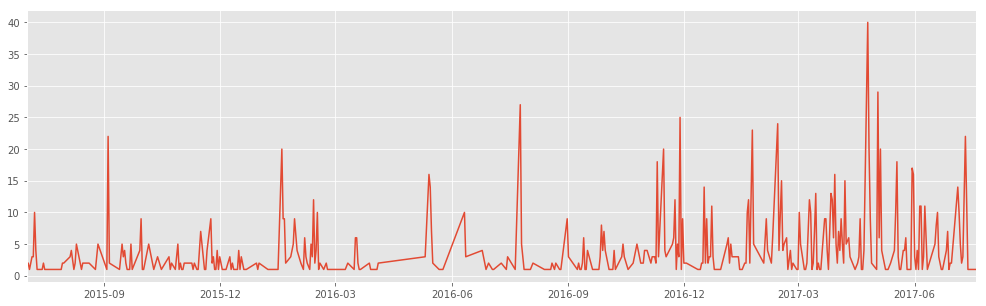

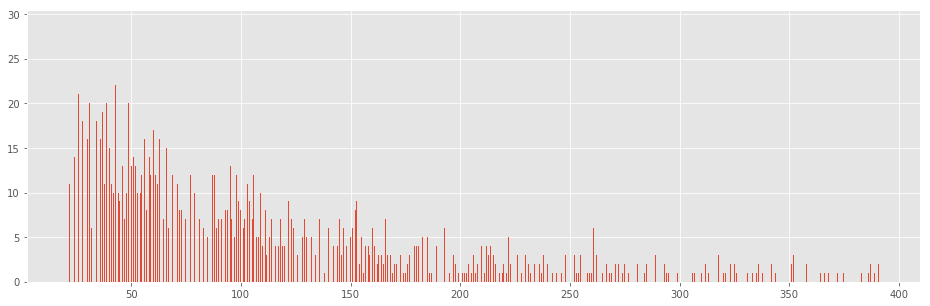

SanFerMunicipio


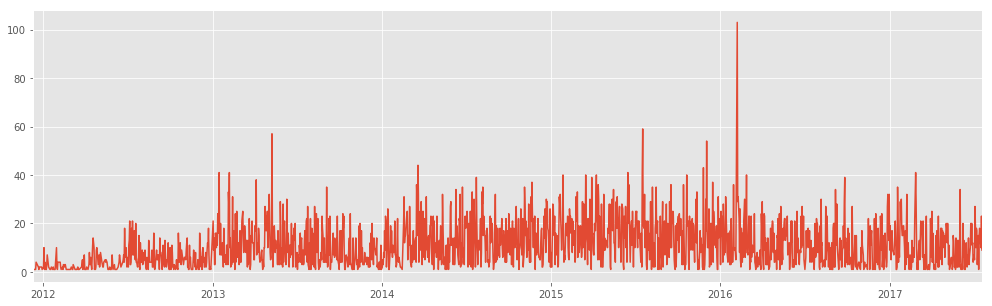

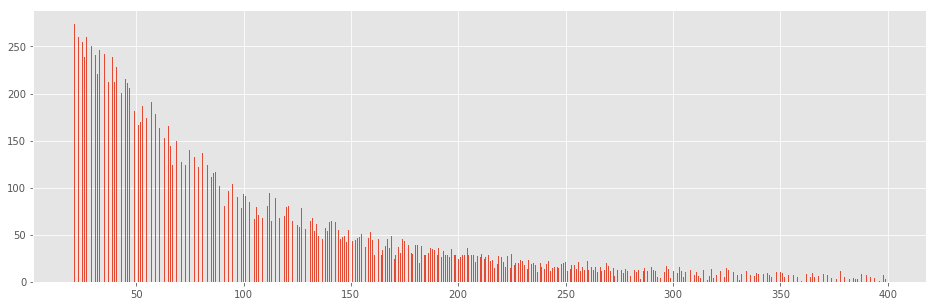

TigreMunicipio


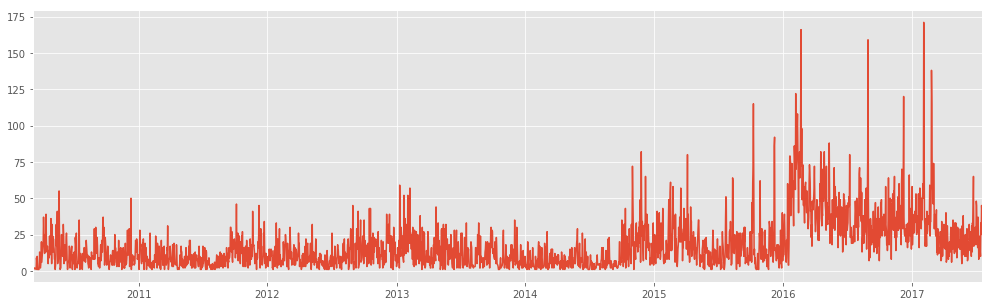

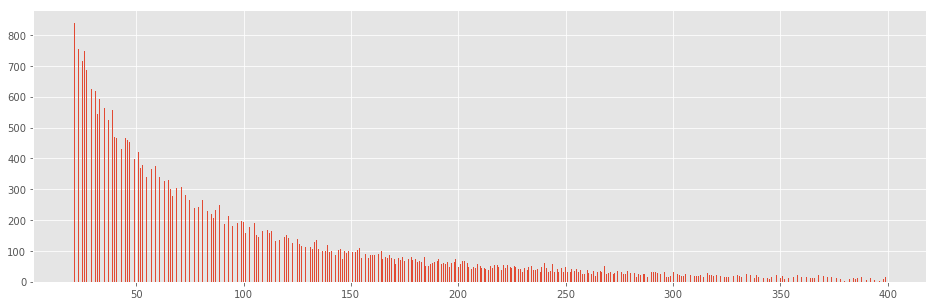

VivamosVL


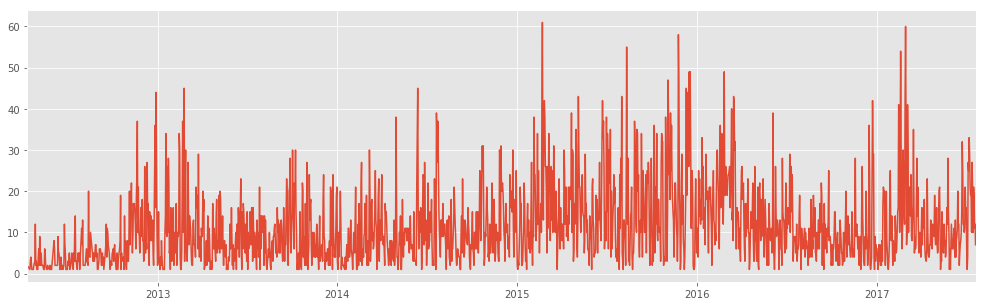

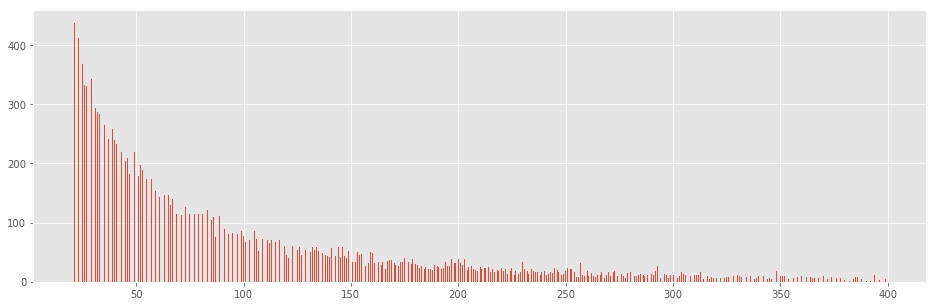

centrodegestionysupervisionezeizanortemuniezeiza


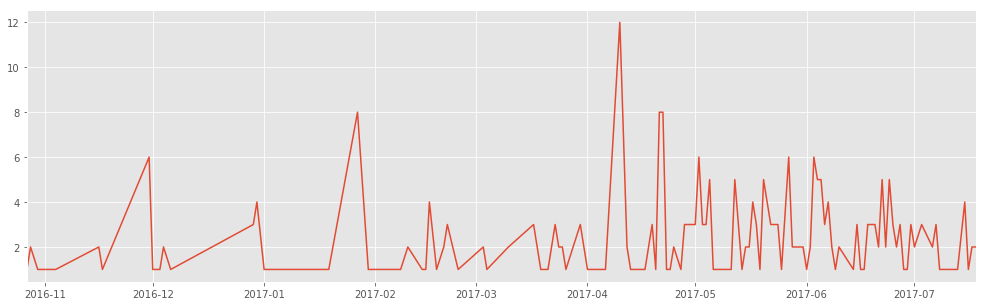

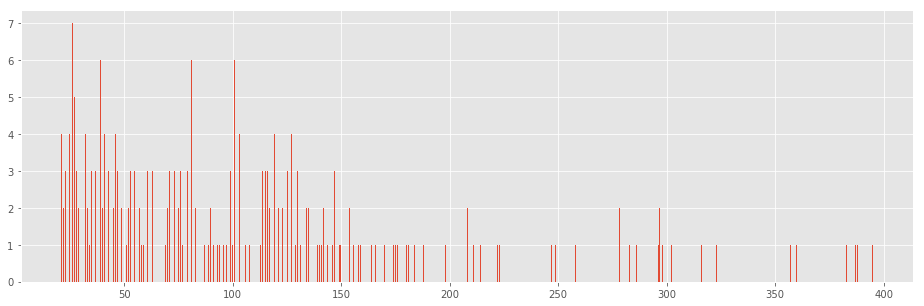

ellugardelafamilia


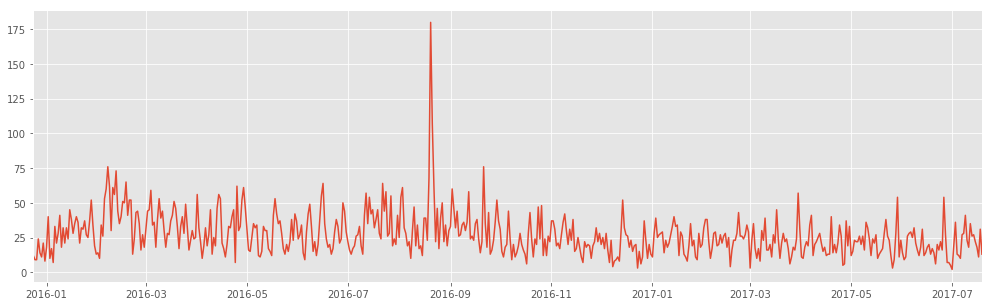

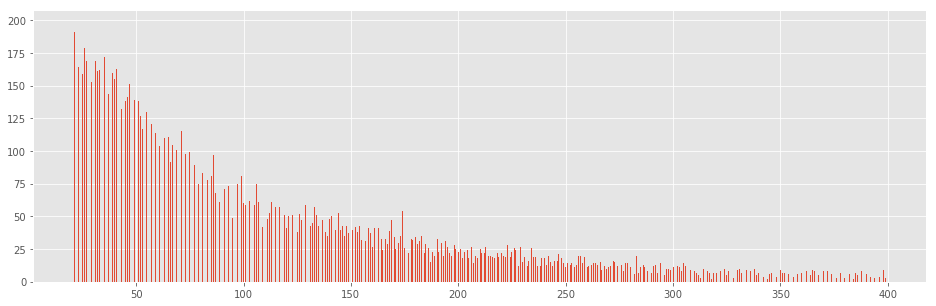

moreno.municip


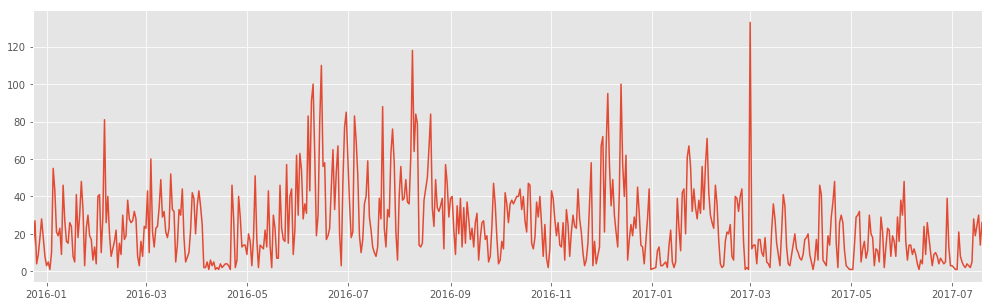

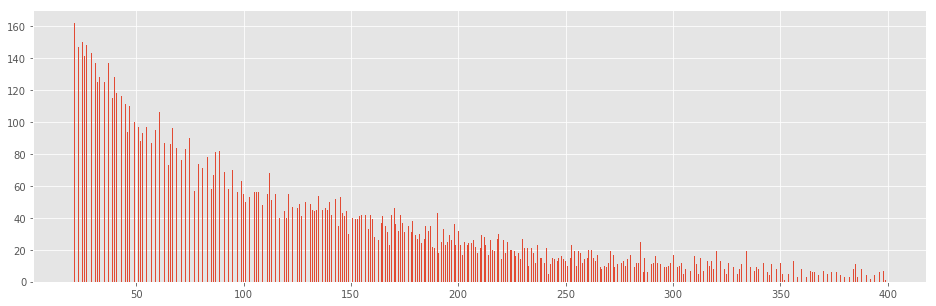

municipalidad.avellaneda


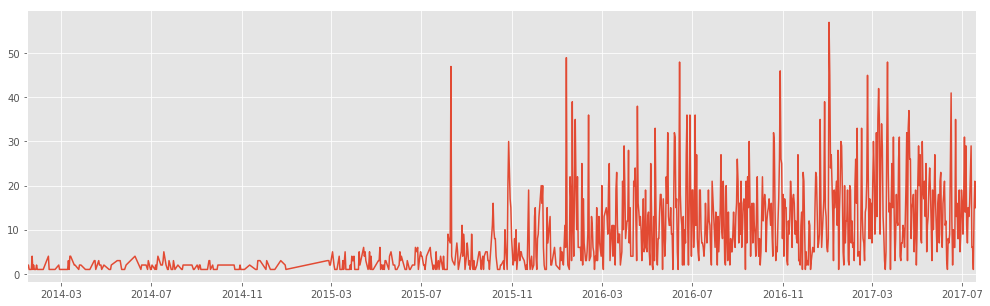

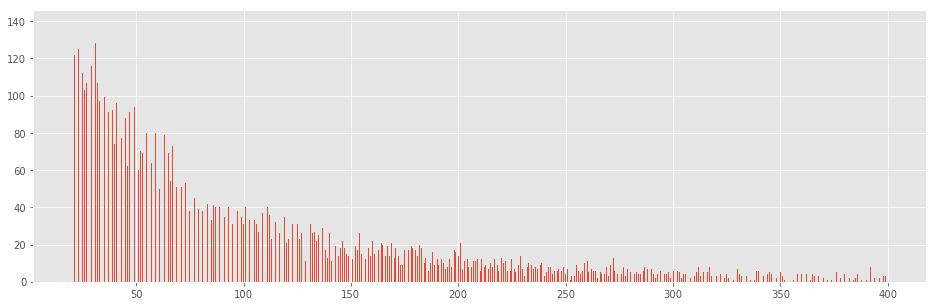

municipiodelamatanza


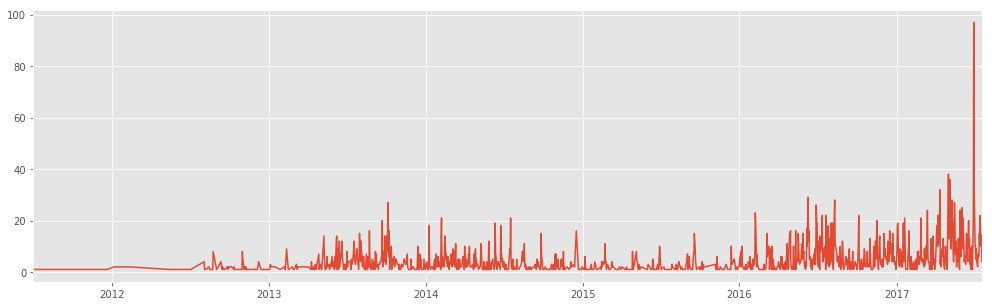

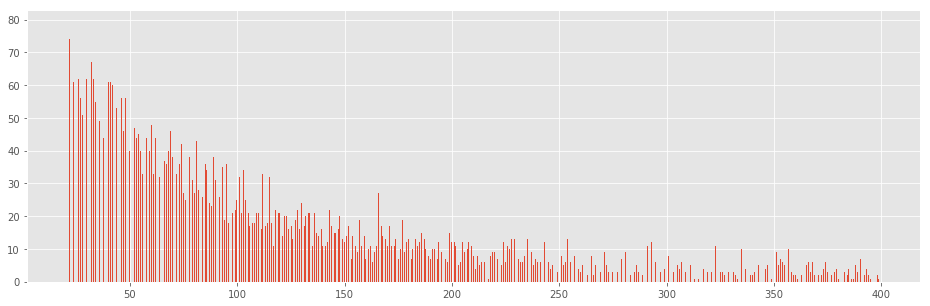

municipiopilar


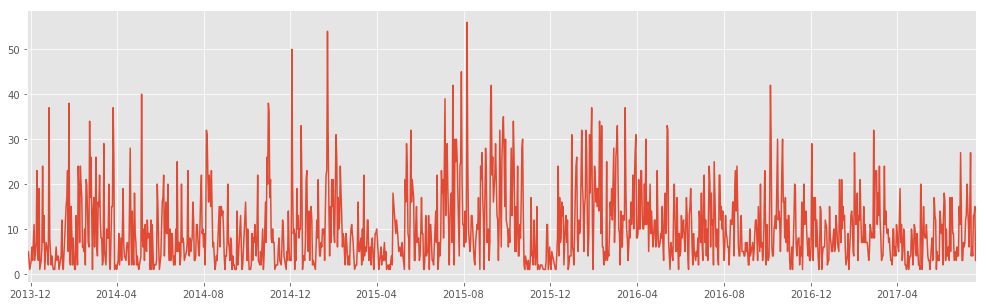

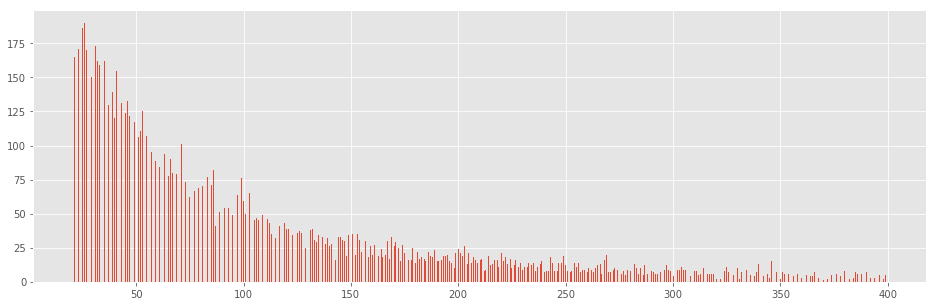

munilomasdezamora


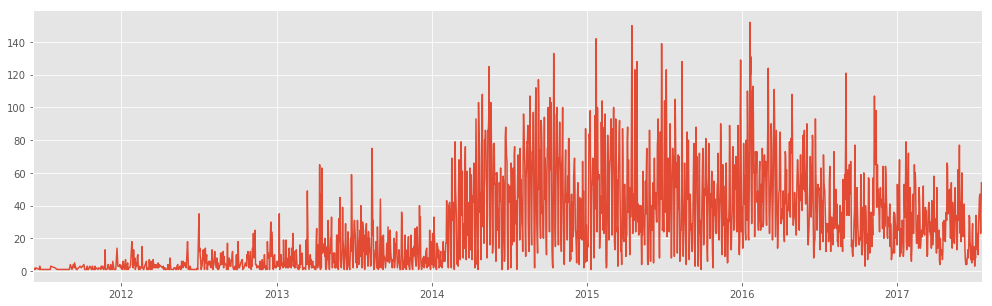

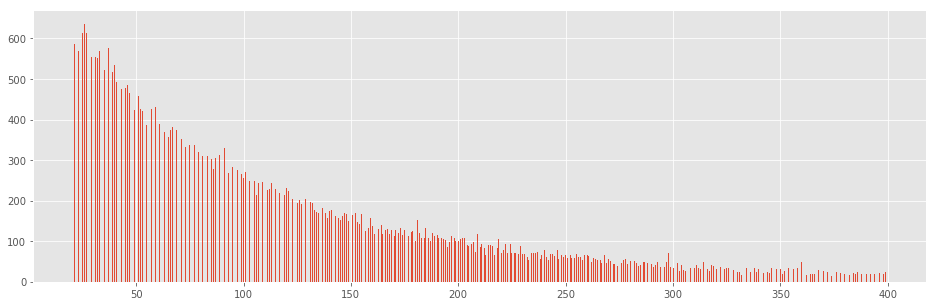

prensa.ituzaingo


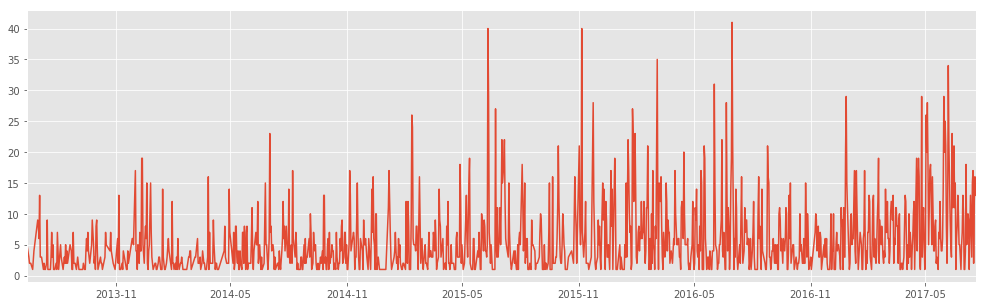

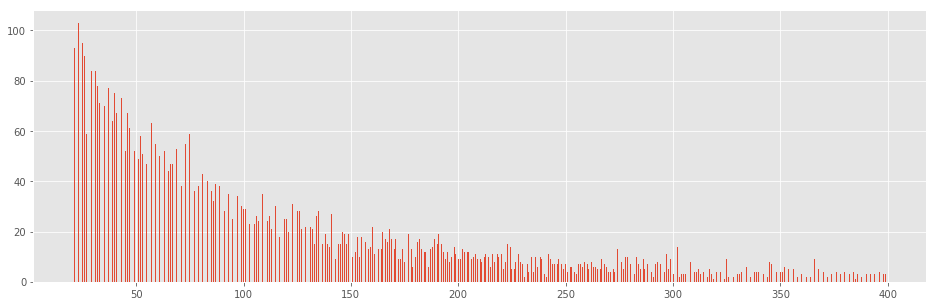

prensaberisso


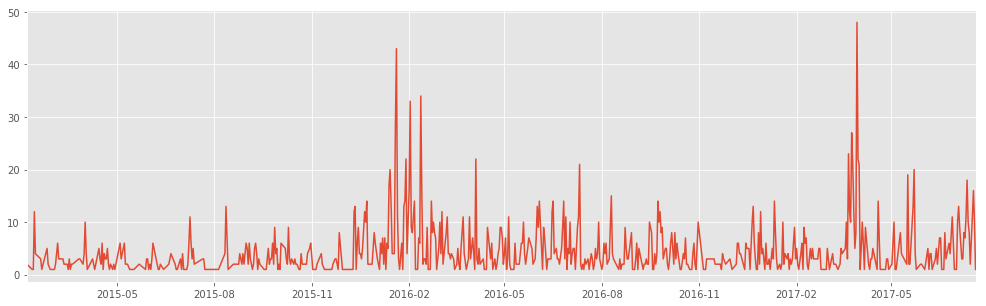

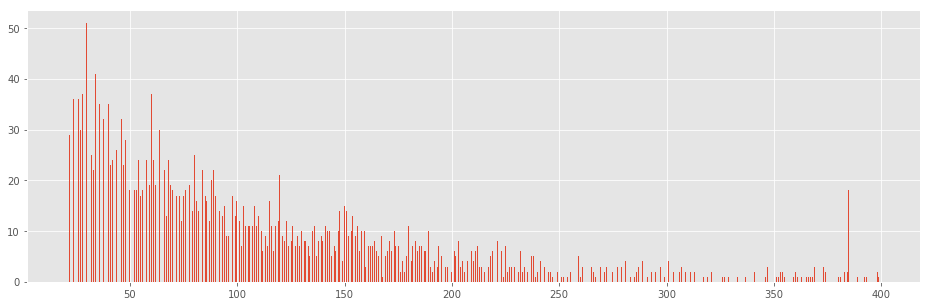

prensamunicipalidadensenada


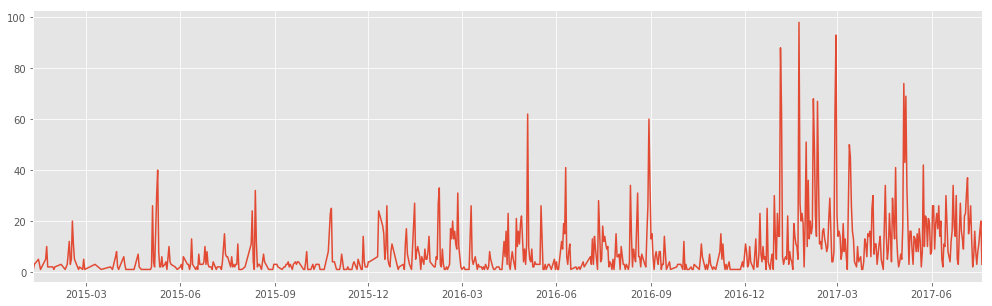

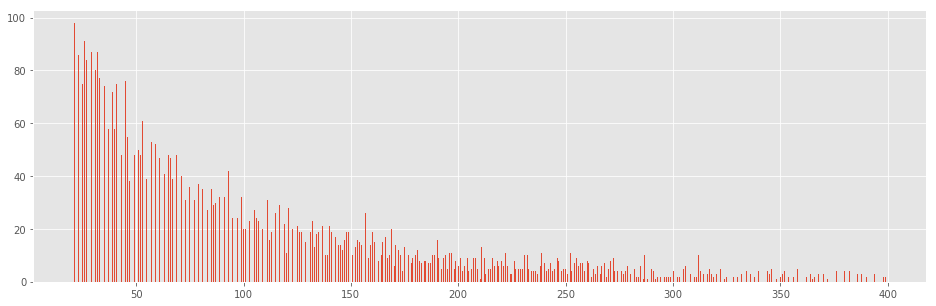

sanisidro.oficial


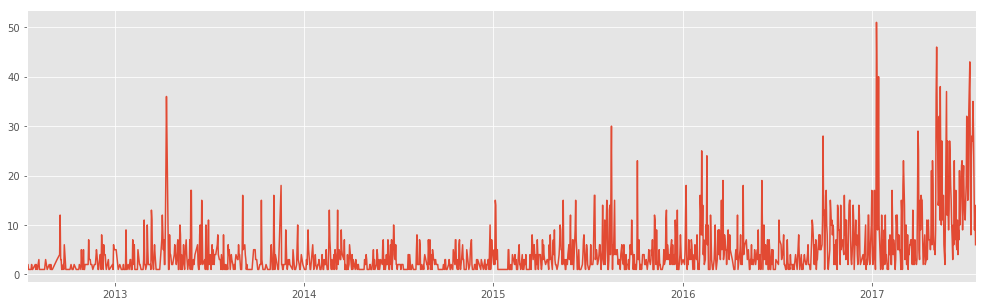

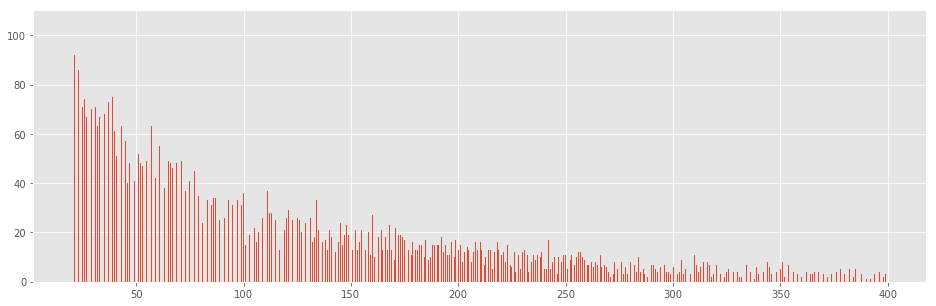

sanmartingob


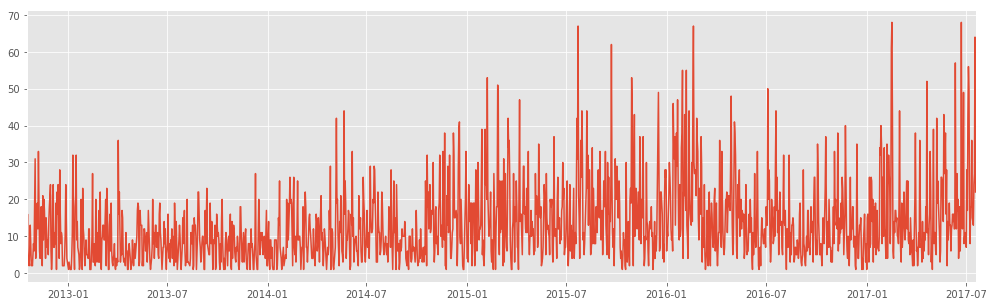

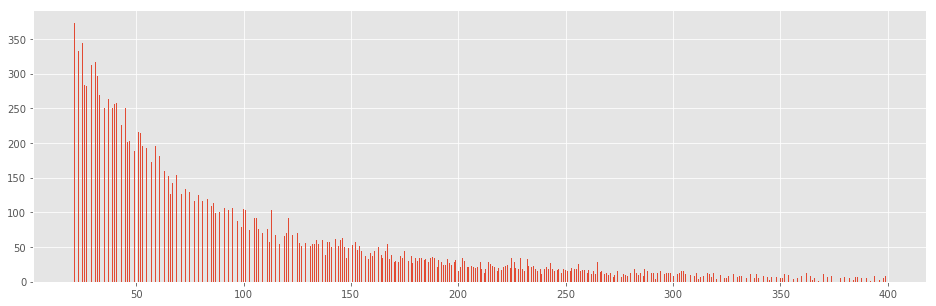

varelamunicipio


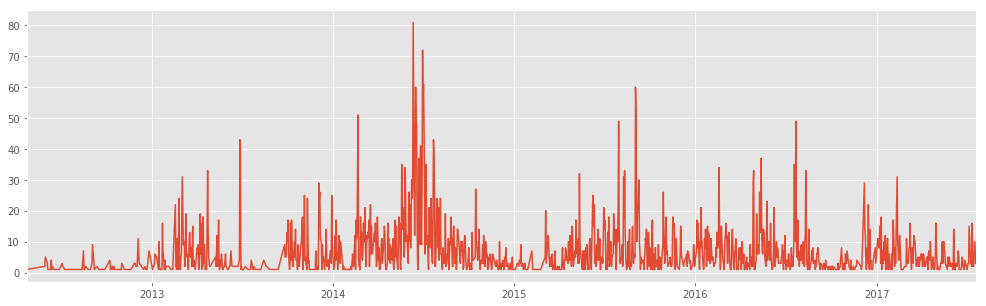

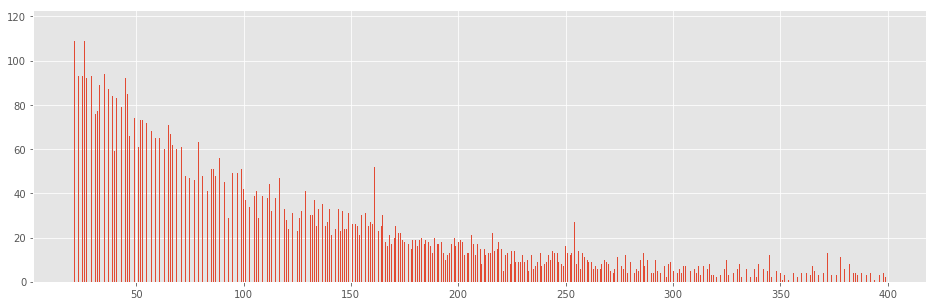

In [6]:
for mdf in df.groupby('muni'):
    print mdf[0]
    mdff = mdf[1]
    mdff = pd.DataFrame(mdff)
    mdff.index = pd.DatetimeIndex(mdff['creado'])
    mdff.groupby(mdff.index.date).count()['comentario'].plot(figsize=(17,5))
    plt.show()
    mdff['comentario'].apply(lambda x: len(x)).hist(figsize=(16, 5), bins=1000)
    plt.show()